# Recommendation System based on *Item Similarity* and implementation with *Pandas* module

#### In this system, the participation of the crowd or else, the 'wisdom of the crowd', is of high contribution.

**datasets: Movie_Id_Titles, u.data, u.item (part of the MovieLens - Movie Recommendation Data Set)**

link: https://grouplens.org/datasets/movielens/

The focus here is on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. This is not a true robust recommendation system. It just tells the user what movies/items are most similar to her movie choice.

### Importing Libraries

In [17]:
import numpy as np
import pandas as pd

### Getting the data

In [18]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

#### loading the 'user' data and creating the dataframe:

In [19]:
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [20]:
# printing the dataframe
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


#### loading the movie titles and creating a dataframe:

In [21]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [22]:
# printing the dataframe
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


**Now, I want to merge the df with the movie_titles dataframe, where the df's *item_id* column corresponds to movie_titles' *item_id* column (Basically, there is a correlation between the item_id and the actual title). This can be done with the Pandas *merge* method. Thus, there will be a connection between the movie title.**

In [23]:
df = pd.merge(df, movie_titles, on='item_id')

In [24]:
# printing the new df
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Exploratory Data Analysis

#### Importing Visualization Libraries:

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

### Creating a ratings dataframe with average rating and number of ratings:

#### 1) Grouping by the title, grabbing the 'rating' column and calculating the mean for each title. Then, sorting values has the parameter ascending=False, so the best rated movies are first. FInally, the head of this process is printed:

In [26]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(15)

title
Marlene Dietrich: Shadow and Light (1996)            5.000
Prefontaine (1997)                                   5.000
Santa with Muscles (1996)                            5.000
Star Kid (1997)                                      5.000
Someone Else's America (1995)                        5.000
Entertaining Angels: The Dorothy Day Story (1996)    5.000
Saint of Fort Washington, The (1993)                 5.000
Great Day in Harlem, A (1994)                        5.000
They Made Me a Criminal (1939)                       5.000
Aiqing wansui (1994)                                 5.000
Pather Panchali (1955)                               4.625
Anna (1996)                                          4.500
Everest (1998)                                       4.500
Maya Lin: A Strong Clear Vision (1994)               4.500
Some Mother's Son (1996)                             4.500
Name: rating, dtype: float64

#### 2) seeing the movies with the most ratings:

In [27]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(15)

title
Star Wars (1977)                    584
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Name: rating, dtype: int64

#### 3) Putting all the above to a dataframe:

In [28]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [29]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


**Rating depends on how many people rated each movie. For example, if a 5-star rating for a movie has become by only one person, it doesn't seems really helpful versus if a thousanf of people rated it. Thus,  a number of ratings column *('number of ratings')* is imprtant to be bear the *rating* column of the dataframe:**

In [30]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [32]:
# checking again the head of ratings dataframe
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### Creating some histograms:

#### 1) seeing number of ratings distribution

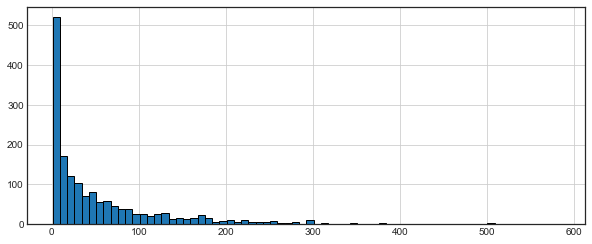

In [33]:
# using Pandas built-in visualization
plt.figure(figsize=(10,4))
ratings['number of ratings'].hist(bins=70, edgecolor="k")

As seen above, the most of the number of ratings are quite few (i.e. 0 or 1).

#### 2) seeing ratings distribution

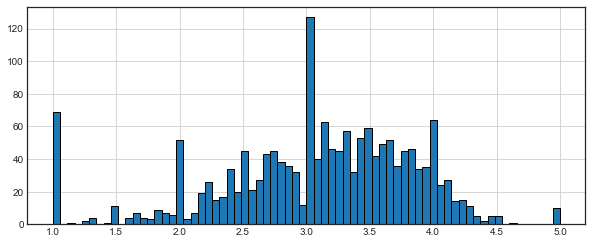

In [34]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70, edgecolor="k")

#### 3) distribution or relationship between the actual average rating and the number of ratings

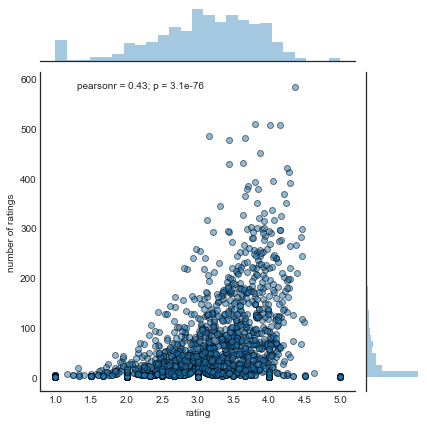

In [35]:
sns.jointplot(x='rating',y='number of ratings',data=ratings,alpha=0.5, edgecolor="k")

The plot above indicates something: *As you get more ratings you're more likely to actually have a higher rating of a movie*. This makes makes sense because the better the movie the more people are in to watch it and the more people that are going to watch it the more likely there will be a higher number of people reviewing or rating the movie.

## Building the Recommendation system

**Recommending similar movies**

Creating a matrix that has the user ids on one axis and the movie titles on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [36]:
# checking df again
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


There is a lot of interest in the *title*, *the user_id*, and the *rating* columns.

#### Using pivot table to make the matrix form of Tables that contains all the users' ratings to each movie. Each row contains the user_id and her ratings to eahc movie title she watched:

In [37]:
moviematrix = df.pivot_table(index='user_id', columns='title', values='rating')

In [38]:
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are many NaN values because most people have not seen the most of the movies.

#### Checking again the most rated movies:

In [39]:
ratings.sort_values('number of ratings' ,ascending=False).head(15)

,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


### Choosing two movies: starwars, a sci-fi movie. And Liar Liar, a comedy:

#### Grabbing the user ratings for these two movies:

In [40]:
#Star Wars
starwars_user_ratings = moviematrix['Star Wars (1977)']

In [41]:
# Liar Liar
liarliar_user_ratings = moviematrix['Liar Liar (1997)']

#### Checking these out (these variables are Series):

In [42]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [43]:
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

The Series above show each user with her rating that gave to that movie.

### Using *corrwith()* method to get correlations between two Pandas series or Dataframe objects:

In [44]:
similar_to_starwars = moviematrix.corrwith(starwars_user_ratings)

/Users/pantelistzamalis/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/pantelistzamalis/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [45]:
similar_to_starwars.head(15)

title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
8 1/2 (1963)                                  -0.142977
8 Heads in a Duffel Bag (1997)                -0.577350
8 Seconds (1994)                              -0.755929
A Chef in Love (1996)                          0.868599
Above the Rim (1994)                          -0.645497
dtype: float64

In [46]:
similar_to_liarliar = moviematrix.corrwith(liarliar_user_ratings)

/Users/pantelistzamalis/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/pantelistzamalis/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [47]:
similar_to_liarliar.head(15)

title
'Til There Was You (1997)                      0.118913
1-900 (1994)                                        NaN
101 Dalmatians (1996)                          0.469765
12 Angry Men (1957)                            0.066272
187 (1997)                                     0.175145
2 Days in the Valley (1996)                    0.040739
20,000 Leagues Under the Sea (1954)           -0.027932
2001: A Space Odyssey (1968)                  -0.057864
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.400918
8 1/2 (1963)                                   0.178064
8 Heads in a Duffel Bag (1997)                      NaN
8 Seconds (1994)                                    NaN
A Chef in Love (1996)                          0.000000
Above the Rim (1994)                           0.422577
dtype: float64

Here, the result is the title of bunch of movies and their correlation with the Star Wars/Liar Liar user ratings. 

All I'm asking here is for the correlation of every other movie to that specific user behavior on the Star Wars/Liar Liar movie. 

Thus, *similar_to_starwars* is equal to the movie Matrix (pivot table), where each *user_id* row is each user's ratings to all the movies she watched (there are many NaN values as many users don't see all the movies available or they are uncorrelated with their movie preference).

#### Making a dataframe instead of a series, and cleaning the data (i.e. removing the NaN values), so the above will look a little nicer:

In [48]:
# creating Star Wars correlation dataframe
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

In [49]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [50]:
corr_starwars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
Data columns (total 1 columns):
Correlation    1410 non-null float64
dtypes: float64(1)
memory usage: 106.0+ KB


In [51]:
# cleaning the data by dropping NaN values
corr_starwars.dropna(inplace=True)

In [52]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [53]:
corr_starwars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1410 entries, 'Til There Was You (1997) to unknown
Data columns (total 1 columns):
Correlation    1410 non-null float64
dtypes: float64(1)
memory usage: 22.0+ KB


Now if the dataframe is sorted by correlation, I should get the most similar movies. However, I note that I get some results that don't really make sense. Some movies that are not similar to Star Wars have correlation 1. This is because there are a lot of movies only watched once by users (and they rated these movies by 5-stars) who also watched Star Wars (it is the most popular movie, as shown above).

In [54]:
# sorting the Star Wars correlation dataframe
corr_starwars.sort_values(by='Correlation', ascending=False).head(20)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


### Fixing this by filtering out movies that have less than 100 reviews (this value was chosen based off the 'number of ratings distribution' histogram from above). As the histogram shows, there is a serious decline to the first 100 number of ratings. Thus, a threshold is set up for the minimum movie ratings that are going to be as an input to the Recommend Model After 'playing' with that threshold, a good value is to filtering out movies that have less than *100* reviews.

#### 1) Joining the corr_starwars datafrane with the ratings dataframe, joining by the 'number of ratings' column
I use *join()* method instead of *merge()* because the title is the index of the dataframe

In [55]:
corr_starwars = corr_starwars.join(ratings['number of ratings'])

In [56]:
corr_starwars.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


#### 2) Filtering out reviews that have less than 100 ratings

In [57]:
corr_starwars[corr_starwars['number of ratings'] > 100].sort_values(by='Correlation', ascending=False).head(15)

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


#### Now, I notice how the titles make a lot more sense! The next two movies are Star Wars movies too! The 'Raiders of the Lost Ark' is an action movie too, but not a Sci-Fi, and as a result has less correlation. Finally, the 'Austin Powers: International Man of Mystery' movie (which is a comedy and not related with Star Wars), and after that, the correlation values have a huge decline, as that movies are not in general relevant to Star Wars!

### Making the same processing for *Liar Liar* movie

#### 1) Creating the Liar Liar correlation dataframe:

In [58]:
corr_liarliar = pd.DataFrame(data=similar_to_liarliar, columns=['Correlation'])

In [59]:
corr_liarliar.head(10)

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
"20,000 Leagues Under the Sea (1954)",-0.027932
2001: A Space Odyssey (1968),-0.057864
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [60]:
corr_liarliar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
Data columns (total 1 columns):
Correlation    1375 non-null float64
dtypes: float64(1)
memory usage: 106.0+ KB


**Seeing here: 1664 entries --> 1375 non-null values. I have to clean up the data (i.e. removing the NaN values)**

#### 2) Cleaning the data:

In [61]:
corr_liarliar.dropna(inplace=True)

In [62]:
corr_liarliar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1375 entries, 'Til There Was You (1997) to unknown
Data columns (total 1 columns):
Correlation    1375 non-null float64
dtypes: float64(1)
memory usage: 21.5+ KB


**Now there are no NaN values!**

#### 3) Joining the Liar Liar correlation dataframe with the *'number of ratings'* column of the *ratings* dataframe:

In [63]:
corr_liarliar = corr_liarliar.join(ratings['number of ratings'])

In [64]:
corr_liarliar.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


#### 4) Filtering out reviews that have less than 100 ratings

In [65]:
corr_liarliar[corr_liarliar['number of ratings'] > 100].sort_values(by='Correlation', ascending=False).head(15)

,Correlation,number of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


#### And that's how a simple Recommendation System is built up for two movies!